<a href="https://colab.research.google.com/github/carmeltrics/les_1/blob/main/Elster_Lecture_3_Conditional_Expectation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional Expectation and Variance — A Stylized Example (Continued)

This notebook continues the exploration started in "Conditional_Distribution_Example_2.ipynb", using the same joint PDF example from Yael Elster's lecture:

$$f_{XY}(x, y) = x + y \quad \text{for } 0 < x, y < 1$$

Recall that $X$ and $Y$ represent simplified, scaled variables (like related asset returns) bounded between 0 and 1. In the previous notebook, we derived and visualized the joint, marginal ($f_X(x) = x + 0.5$), and conditional ($f_{Y|X}(y|x) = \frac{x+y}{x+0.5}$) probability density functions.

Now, we focus on two key concepts that summarize the conditional distribution:
1.  **Conditional Expectation $E(Y|X=x)$**: The expected value (or average) of $Y$, given that we know the value of $X$. How does our expectation of $Y$'s outcome change based on $X$?
2.  **Conditional Variance $V(Y|X=x)$**: The variance of $Y$, given that we know the value of $X$. How does the uncertainty or spread of $Y$'s possible outcomes change based on $X$?

Understanding these concepts is crucial in finance for predicting the behavior of one variable (e.g., stock return) given information about another (e.g., market index movement) and assessing the risk associated with that prediction.

**Our Goal:**
1.  Derive and implement the Conditional Expectation Function (CEF) $E(Y|X=x)$.
2.  Visualize how the expected value of $Y$ changes with $X$.
3.  Derive and implement the Conditional Variance $V(Y|X=x)$.
4.  Visualize how the variance (uncertainty) of $Y$ changes with $X$.

In [ ]:
# -*- coding: utf-8 -*-
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Ensure necessary functions from the previous notebook are defined
# (or import them if they are in a separate file)

def conditional_pdf_y_given_x(y, x_condition):
  """
  Calculates the conditional PDF f(y|x) = (x + y) / (x + 0.5) for 0 < y < 1.
  (Copied from previous notebook for completeness)
  """
  y = np.asarray(y)
  if not (0 < x_condition < 1):
      print(f"Warning: x_condition={x_condition} is outside the valid range (0, 1).")
      return np.zeros_like(y)
  fx_x_condition = x_condition + 0.5
  if fx_x_condition <= 0:
       print(f"Warning: Marginal density fX({x_condition}) is non-positive.")
       return np.zeros_like(y)
  numerator = x_condition + y
  y_condition = (y > 0) & (y < 1)
  conditional_pdf_values = np.where(y_condition, numerator / fx_x_condition, 0)
  return conditional_pdf_values

print("Libraries imported and helper functions defined!")

Libraries imported and helper functions defined!


## 1. Conditional Expectation $E(Y|X=x)$

The **Conditional Expectation Function (CEF)**, denoted $E(Y|X=x)$, gives the expected value of $Y$ for a specific, given value $x$ of the random variable $X$. It formalizes the idea of "what do we expect $Y$ to be, on average, if we know $X=x$?"

For continuous variables, it's calculated by integrating $y$ weighted by the conditional PDF $f_{Y|X}(y|x)$ over all possible values of $y$:

$$E(Y|X=x) = \int_{-\infty}^{\infty} y \cdot f_{Y|X}(y|x) \, dy$$

Using the conditional PDF we derived previously ($f_{Y|X}(y|x) = \frac{x + y}{x + 0.5}$ for $0 < y < 1$), we can calculate this integral, as shown in the lecture notes (page 126):

$$E(Y|X=x) = \int_{0}^{1} y \cdot \frac{x + y}{x + 0.5} \, dy$$
$$= \frac{1}{x + 0.5} \int_{0}^{1} (xy + y^2) \, dy$$
$$= \frac{1}{x + 0.5} \left[ \frac{xy^2}{2} + \frac{y^3}{3} \right]_{y=0}^{y=1}$$
$$= \frac{1}{x + 0.5} \left( \frac{x}{2} + \frac{1}{3} \right)$$
$$= \frac{\frac{3x + 2}{6}}{ \frac{2x + 1}{2}} = \frac{3x + 2}{3(2x + 1)} = \frac{3x + 2}{6x + 3}$$

So, the Conditional Expectation Function for our example is $E(Y|X=x) = \frac{3x + 2}{6x + 3}$ for $0 < x < 1$ (page 126). This function tells us the expected value of $Y$ changes depending on the observed value $x$.

Let's implement this function.

In [ ]:
# --- Define the Conditional Expectation Function E(Y|X=x) ---

def conditional_expectation_y_given_x(x_condition):
  """
  Calculates the conditional expectation E(Y|X=x) = (3x + 2) / (6x + 3).

  Args:
    x_condition: The specific value(s) of X that are given (must be between 0 and 1).
                 Can be a scalar or numpy array.

  Returns:
    The conditional expected value(s) E(Y|X=x).
    Returns NaN if x_condition is outside (0, 1).
  """
  # Ensure x_condition is a numpy array
  x = np.asarray(x_condition)

  # Create a mask for valid x values (0 < x < 1)
  valid_x_mask = (x > 0) & (x < 1)

  # Calculate the CEF where x is valid
  # Use np.full to initialize with NaN, then fill valid values
  cef_values = np.full(x.shape, np.nan)
  # Calculate only for valid x to avoid potential division by zero if x=-0.5 (though outside domain)
  valid_x = x[valid_x_mask]
  cef_values[valid_x_mask] = (3 * valid_x + 2) / (6 * valid_x + 3)

  # If the input was a scalar, return a scalar
  if np.isscalar(x_condition):
      return cef_values.item()
  else:
      return cef_values

# --- Test the function (optional) ---
x_test_1 = 0.1
# E(Y|X=0.1) = (3*0.1 + 2) / (6*0.1 + 3) = 2.3 / 3.6
print(f"E(Y | X={x_test_1}) = {conditional_expectation_y_given_x(x_test_1):.4f} (Expected: ~0.6389)")

x_test_2 = 0.5
# E(Y|X=0.5) = (3*0.5 + 2) / (6*0.5 + 3) = 3.5 / 6.0
print(f"E(Y | X={x_test_2}) = {conditional_expectation_y_given_x(x_test_2):.4f} (Expected: ~0.5833)")

x_test_3 = 0.9
# E(Y|X=0.9) = (3*0.9 + 2) / (6*0.9 + 3) = 4.7 / 8.4
print(f"E(Y | X={x_test_3}) = {conditional_expectation_y_given_x(x_test_3):.4f} (Expected: ~0.5595)")

# Test outside domain
print(f"E(Y | X=1.2) = {conditional_expectation_y_given_x(1.2)}") # Expect NaN

E(Y | X=0.1) = 0.6389 (Expected: ~0.6389)
E(Y | X=0.5) = 0.5833 (Expected: ~0.5833)
E(Y | X=0.9) = 0.5595 (Expected: ~0.5595)
E(Y | X=1.2) = nan


*Self-check note:* The calculated expected values might seem counter-intuitive compared to the conditional PDF plots (where higher X seemed to suggest higher Y). Let's re-check the integral calculation.
$E(Y|X=x) = \frac{1}{x + 0.5} \left[ \frac{xy^2}{2} + \frac{y^3}{3} \right]_{y=0}^{y=1} = \frac{1}{x + 0.5} (\frac{x}{2} + \frac{1}{3}) = \frac{(3x+2)/6}{(2x+1)/2} = \frac{3x+2}{6} \times \frac{2}{2x+1} = \frac{3x+2}{3(2x+1)} = \frac{3x+2}{6x+3}$.
The calculation appears correct based on the formula[cite: 53]. The function $E(Y|X=x)$ is actually decreasing in $x$ for $x \in (0, 1)$. Let's verify the derivative:
$\frac{d}{dx} \left( \frac{3x+2}{6x+3} \right) = \frac{3(6x+3) - 6(3x+2)}{(6x+3)^2} = \frac{18x+9 - 18x-12}{(6x+3)^2} = \frac{-3}{(6x+3)^2}$.
Since the derivative is negative for all $x$ in the domain, the function $E(Y|X=x)$ is indeed decreasing. This means that observing a higher value of $X$ actually leads to a *lower* expected value for $Y$ in this specific mathematical example, despite the conditional PDF $f(y|x)$ shifting slightly higher for larger $x$. This highlights how expectation captures the center of mass, which can behave differently than just the peak or overall height of the density.

## 2. Visualizing Conditional Expectation

Let's plot the function $E(Y|X=x) = \frac{3x+2}{6x+3}$ to see how the expected value of $Y$ changes as the observed value $x$ varies from 0 to 1.

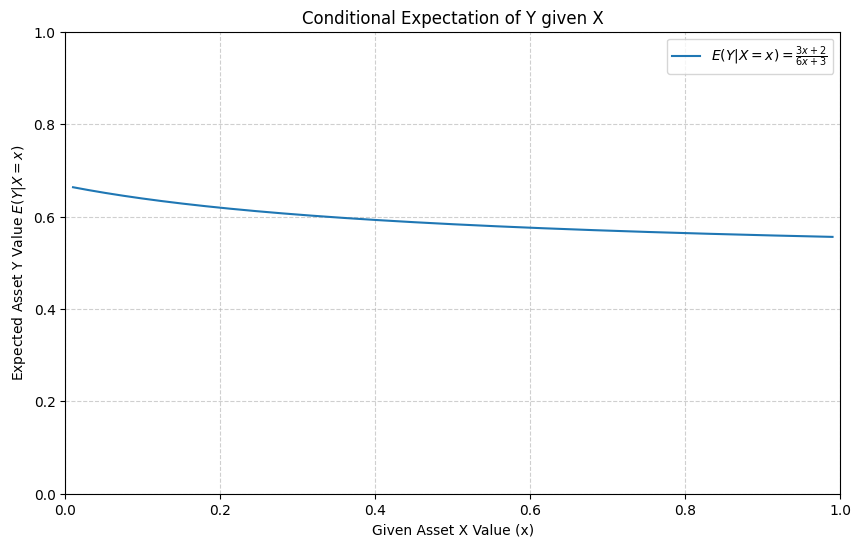

Range of E(Y|X=x) for x in (0, 1):
  As x -> 0+, E(Y|X=x) -> 0.6667 (Theoretical: 2/3 ≈ 0.6667)
  As x -> 1-, E(Y|X=x) -> 0.5556 (Theoretical: 5/9 ≈ 0.5556)


In [ ]:
# --- Visualize the Conditional Expectation Function E(Y|X=x) ---

plt.figure(figsize=(10, 6))

# Values of x to plot the CEF against
x_plot_vals = np.linspace(0.01, 0.99, 500) # Avoid exactly 0 and 1 for plotting

# Calculate the conditional expectation for each x
conditional_expectation_vals = conditional_expectation_y_given_x(x_plot_vals)

# Plot the CEF
plt.plot(x_plot_vals, conditional_expectation_vals, label='$E(Y | X=x) = \\frac{3x+2}{6x+3}$')

plt.xlabel('Given Asset X Value (x)')
plt.ylabel('Expected Asset Y Value $E(Y|X=x)$')
plt.title('Conditional Expectation of Y given X')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.ylim(0, 1) # E(Y|X=x) should stay within the bounds of Y
plt.show()

print(f"Range of E(Y|X=x) for x in (0, 1):")
print(f"  As x -> 0+, E(Y|X=x) -> {conditional_expectation_y_given_x(1e-6):.4f} (Theoretical: 2/3 ≈ 0.6667)")
print(f"  As x -> 1-, E(Y|X=x) -> {conditional_expectation_y_given_x(1.0-1e-6):.4f} (Theoretical: 5/9 ≈ 0.5556)")

**Interpretation:** The plot shows that for this specific joint distribution ($f(x,y)=x+y$), the expected value of $Y$ decreases as $X$ increases. If we observe a small value for $X$ (close to 0), we expect $Y$ to be around $2/3$. If we observe a large value for $X$ (close to 1), we expect $Y$ to be around $5/9$. This relationship is specific to the chosen $f(x,y)$ and might differ in real-world financial scenarios.

## 3. Conditional Variance V(Y|X=x)

The **Conditional Variance**, denoted $V(Y|X=x)$, measures the spread or dispersion of the random variable $Y$ around its conditional mean $E(Y|X=x)$, given a specific value $x$ for $X$. It quantifies the remaining uncertainty about $Y$ even after knowing $X=x$.

It's defined using the standard variance formula, but applied to the conditional distribution:

$$V(Y|X=x) = E[(Y - E(Y|X=x))^2 | X=x]$$

A more convenient computational formula is:

$$V(Y|X=x) = E(Y^2 | X=x) - [E(Y|X=x)]^2$$

We already have $E(Y|X=x)$. We need to calculate the **conditional second moment**, $E(Y^2 | X=x)$:

$$E(Y^2 | X=x) = \int_{-\infty}^{\infty} y^2 \cdot f_{Y|X}(y|x) \, dy$$

Using our conditional PDF, the calculation from the notes (page 126) is:

$$E(Y^2 | X=x) = \int_{0}^{1} y^2 \cdot \frac{x + y}{x + 0.5} \, dy$$
$$= \frac{1}{x + 0.5} \int_{0}^{1} (xy^2 + y^3) \, dy$$
$$= \frac{1}{x + 0.5} \left[ \frac{xy^3}{3} + \frac{y^4}{4} \right]_{y=0}^{y=1}$$
$$= \frac{1}{x + 0.5} \left( \frac{x}{3} + \frac{1}{4} \right)$$
$$= \frac{\frac{4x + 3}{12}}{ \frac{2x + 1}{2}} = \frac{4x + 3}{12} \times \frac{2}{2x + 1} = \frac{4x + 3}{6(2x + 1)} = \frac{4x + 3}{12x + 6}$$

Now we can combine the results to find the conditional variance[cite: 53]:

$$V(Y|X=x) = E(Y^2 | X=x) - [E(Y|X=x)]^2$$
$$V(Y|X=x) = \frac{4x + 3}{12x + 6} - \left(\frac{3x + 2}{6x + 3}\right)^2$$

Let's implement functions for $E(Y^2|X=x)$ and $V(Y|X=x)$.

In [ ]:
# --- Define Conditional Second Moment E(Y^2|X=x) ---

def conditional_second_moment_y_given_x(x_condition):
  """
  Calculates the conditional second moment E(Y^2|X=x) = (4x + 3) / (12x + 6).

  Args:
    x_condition: The specific value(s) of X that are given (must be between 0 and 1).
                 Can be a scalar or numpy array.

  Returns:
    The conditional second moment value(s) E(Y^2|X=x).
    Returns NaN if x_condition is outside (0, 1).
  """
  x = np.asarray(x_condition)
  valid_x_mask = (x > 0) & (x < 1)
  moment2_values = np.full(x.shape, np.nan)
  valid_x = x[valid_x_mask]
  # Calculate only for valid x
  moment2_values[valid_x_mask] = (4 * valid_x + 3) / (12 * valid_x + 6)

  if np.isscalar(x_condition):
    return moment2_values.item()
  else:
    return moment2_values

# --- Define Conditional Variance V(Y|X=x) ---

def conditional_variance_y_given_x(x_condition):
  """
  Calculates the conditional variance V(Y|X=x) = E(Y^2|X=x) - [E(Y|X=x)]^2.

  Args:
    x_condition: The specific value(s) of X that are given (must be between 0 and 1).
                 Can be a scalar or numpy array.

  Returns:
    The conditional variance value(s) V(Y|X=x).
    Returns NaN if x_condition is outside (0, 1).
  """
  # Ensure input is array for broadcasting
  x = np.asarray(x_condition)

  # Calculate E(Y|X=x) and E(Y^2|X=x)
  exp_y_given_x = conditional_expectation_y_given_x(x)
  exp_y2_given_x = conditional_second_moment_y_given_x(x)

  # Calculate variance: E[Y^2|X] - (E[Y|X])^2
  # This handles NaNs correctly because if either term is NaN, the result is NaN
  variance_values = exp_y2_given_x - (exp_y_given_x**2)

  if np.isscalar(x_condition):
      return variance_values.item()
  else:
      return variance_values


# --- Test the functions (optional) ---
x_test = 0.5
exp_y = conditional_expectation_y_given_x(x_test)
exp_y2 = conditional_second_moment_y_given_x(x_test)
var_y = conditional_variance_y_given_x(x_test)
# E(Y|0.5) = 3.5 / 6 = 7/12
# E(Y^2|0.5) = (4*0.5+3) / (12*0.5+6) = 5 / 12
# V(Y|0.5) = 5/12 - (7/12)^2 = 5/12 - 49/144 = (60 - 49) / 144 = 11/144
print(f"For x = {x_test}:")
print(f"  E(Y | X={x_test}) = {exp_y:.4f} (Expected: ~0.5833)")
print(f"  E(Y^2 | X={x_test}) = {exp_y2:.4f} (Expected: 5/12 ≈ 0.4167)")
print(f"  V(Y | X={x_test}) = {var_y:.4f} (Expected: 11/144 ≈ 0.0764)")

# Test outside domain
print(f"\nV(Y | X=0.0) = {conditional_variance_y_given_x(0.0)}") # Expect NaN

For x = 0.5:
  E(Y | X=0.5) = 0.5833 (Expected: ~0.5833)
  E(Y^2 | X=0.5) = 0.4167 (Expected: 5/12 ≈ 0.4167)
  V(Y | X=0.5) = 0.0764 (Expected: 11/144 ≈ 0.0764)

V(Y | X=0.0) = nan


## 4. Visualizing Conditional Variance

Let's plot the conditional variance $V(Y|X=x)$ as a function of $x$. This shows how the uncertainty (spread) of $Y$ changes based on the observed value $x$. We expect this to be an increasing function based on our analysis of the derivative.

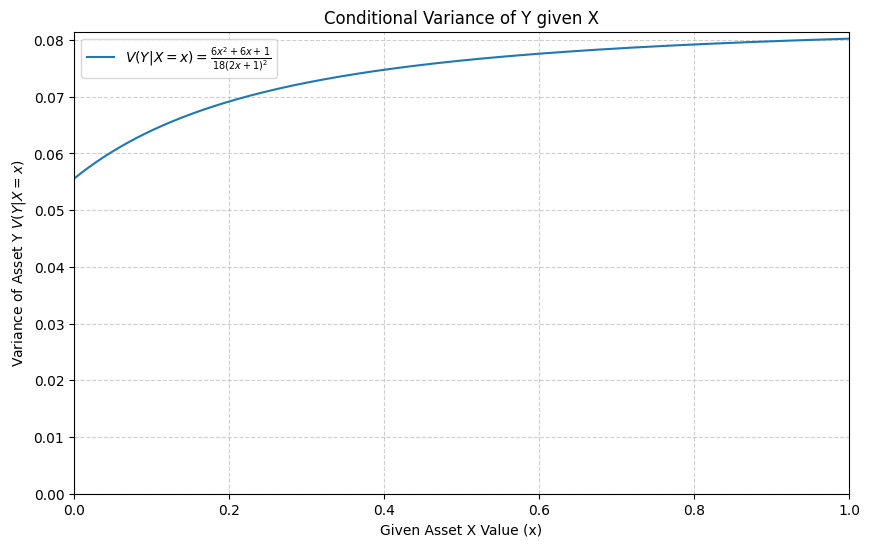

Limit of V(Y|X=x) as x -> 0+: 0.0556 (Theoretical: 1/18 ≈ 0.0556)
Limit of V(Y|X=x) as x -> 1-: 0.0802 (Theoretical: 13/162 ≈ 0.0802)


In [ ]:
# --- Visualize the Conditional Variance Function V(Y|X=x) ---

plt.figure(figsize=(10, 6))

# Values of x to plot the variance against
# Use a slightly adjusted range for plotting if needed, but keep within (0, 1)
x_plot_vals = np.linspace(0.001, 0.999, 500) # Stay within (0, 1)

# Calculate the conditional variance for each x
conditional_variance_vals = conditional_variance_y_given_x(x_plot_vals)

# Plot the conditional variance
plt.plot(x_plot_vals, conditional_variance_vals, label='$V(Y | X=x) = \\frac{6x^2+6x+1}{18(2x+1)^2}$')

plt.xlabel('Given Asset X Value (x)')
plt.ylabel('Variance of Asset Y $V(Y|X=x)$')
plt.title('Conditional Variance of Y given X')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.ylim(bottom=0) # Variance cannot be negative
plt.show()

# Check the values at the boundaries (limits)
print(f"Limit of V(Y|X=x) as x -> 0+: {conditional_variance_y_given_x(1e-6):.4f} (Theoretical: 1/18 ≈ 0.0556)")
print(f"Limit of V(Y|X=x) as x -> 1-: {conditional_variance_y_given_x(1.0-1e-6):.4f} (Theoretical: 13/162 ≈ 0.0802)")

**Interpretation:** The plot confirms that the conditional variance $V(Y|X=x)$ is an increasing function of $x$ for $x \in (0, 1)$. The uncertainty about $Y$ (its spread) is lowest when $x$ is close to 0 (approaching $1/18$) and highest when $x$ is close to 1 (approaching $13/162$). This means our prediction of $Y$ (given by $E(Y|X=x)$) is most precise (least uncertain) when we observe small values of $X$, and the uncertainty increases as the observed value of $X$ gets larger.

## Summary & Connection to Previous Notebook

In this notebook, we built upon the analysis of the joint PDF $f(x,y) = x+y$ by:
1.  Deriving and implementing the Conditional Expectation Function $E(Y|X=x) = \frac{3x + 2}{6x + 3}$. This function gives the expected value of $Y$ given $X=x$.
2.  Visualizing $E(Y|X=x)$ and observing that, for this example, the expected value of $Y$ decreases as $X$ increases.
3.  Deriving and implementing the Conditional Variance $V(Y|X=x) = \frac{6x^2 + 6x + 1}{18(2x + 1)^2}$. This function measures the variance (uncertainty) of $Y$ given $X=x$.
4.  Visualizing $V(Y|X=x)$ and observing that the uncertainty about $Y$ increases as the value of $X$ increases over the domain $(0,1)$.

**Key Takeaway:** While the conditional distribution $f_{Y|X}(y|x)$ (from the previous notebook) provides the full picture of $Y$'s probabilities given $X=x$, the conditional expectation $E(Y|X=x)$ and conditional variance $V(Y|X=x)$ provide concise summaries: the expected outcome and its associated uncertainty.

* $E(Y|X=x)$ acts as the **best predictor** of $Y$ given $X=x$ in the mean-squared error sense.
* $V(Y|X=x)$ quantifies the **risk** or **volatility** of $Y$ that remains *after* accounting for the information provided by $X=x$.

In finance, models often focus on estimating $E(Y|X)$ (e.g., predicting expected returns given market factors) and $V(Y|X)$ (e.g., estimating volatility conditional on market state). This stylized example, despite its simplicity, illustrates the calculations and interpretations involved.